In [1]:
# In [1]: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# In [2]: Load dataset
df = pd.read_csv(r"C:\Users\Nandh\OneDrive\Documents\project\train.csv")
df.head()

# In [3]: Inspect dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [2]:
# In [4]: Check class distribution and missing values
print(df["fake"].value_counts())
print(df.isnull().sum())

fake
0    288
1    288
Name: count, dtype: int64
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Text(0.5, 0, 'Class')

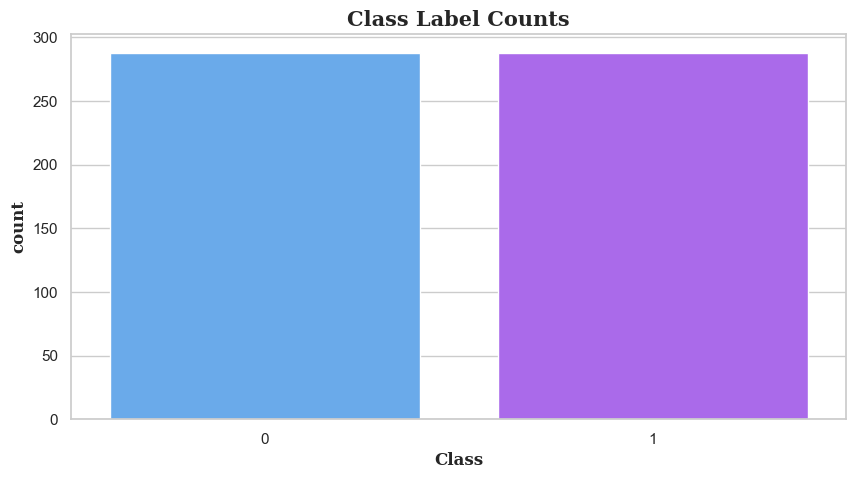

In [3]:
# In [5]: Visualize class imbalance
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x="fake", data=df, hue="fake", palette=sns.color_palette("cool", 2), legend=False)
plt.title("Class Label Counts", {"fontname": "serif", "fontweight": "bold", "fontsize": "15"})
plt.ylabel("count", {"fontname": "serif", "fontweight": "bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight": "bold"})

In [4]:
# In [6]: Remove duplicates
df = df.drop_duplicates()
df.shape


(574, 12)

In [5]:
print("Current class distribution (already balanced):")
print(df['fake'].value_counts())

Current class distribution (already balanced):
fake
0    287
1    287
Name: count, dtype: int64


Text(0.5, 0, 'Class')

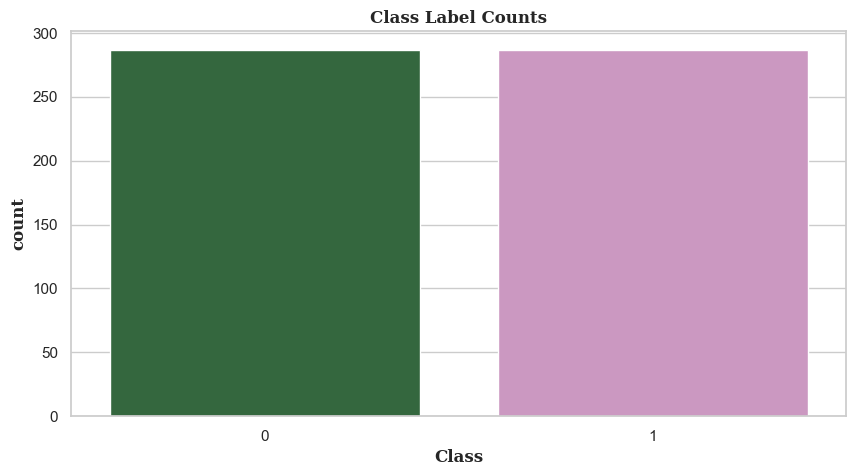

In [6]:
# In [8]: Visualize balanced data
plt.figure(figsize=(10, 5))
sns.countplot(x="fake", data=df, hue="fake", palette=sns.color_palette("cubehelix", 2), legend=False)
plt.title("Class Label Counts", {"fontname":"serif", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname":"serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname":"serif", "fontweight":"bold"})

In [7]:
# In [10]: Split features and target
x = df.drop(columns=['fake'])
y = df['fake']
x.shape, y.shape



((574, 11), (574,))

In [8]:
# In [11]: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=40)


In [9]:
# In [12]: Feature scaling
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

pd.DataFrame(x_test).to_csv(r"C:\Users\Nandh\OneDrive\Documents\project\test.csv")


In [10]:
# In [13]: KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
pred_knn = knn_model.predict(x_test)
train_accuracy = accuracy_score(y_train, knn_model.predict(x_train))
test_accuracy = accuracy_score(y_test, pred_knn)
print(f"KNN Test Accuracy: {test_accuracy:.4f}")

KNN Test Accuracy: 0.8844


In [11]:
# In [15]: Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
pred_log = log_model.predict(x_test)
train_accuracy1 = accuracy_score(y_train, log_model.predict(x_train))
test_accuracy1 = accuracy_score(y_test, pred_log)
print(f"Logistic Regression Test Accuracy: {test_accuracy1:.4f}")

Logistic Regression Test Accuracy: 0.9017


In [12]:
# In [17]: Decision Tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, criterion='entropy')
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
train_accuracy2 = accuracy_score(y_train, dt.predict(x_train))
test_accuracy2 = accuracy_score(y_test, pred_dt)
print(f"Decision Tree Test Accuracy: {test_accuracy2:.4f}")

Decision Tree Test Accuracy: 0.9191


In [13]:
# In [20]: Random Forest
clf = RandomForestClassifier(max_depth=5, n_estimators=20)
clf.fit(x_train, y_train)
pred_rf = clf.predict(x_test)
train_accuracy3 = accuracy_score(y_train, clf.predict(x_train))
test_accuracy3 = accuracy_score(y_test, pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy3:.4f}")

Random Forest Test Accuracy: 0.9249


In [14]:
# In [23]: XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04, random_state=1)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
train_accuracy4 = accuracy_score(y_train, xgb_model.predict(x_train))
test_accuracy4 = accuracy_score(y_test, pred_xgb)
print(f"XGBoost Test Accuracy: {test_accuracy4:.4f}")

XGBoost Test Accuracy: 0.9017


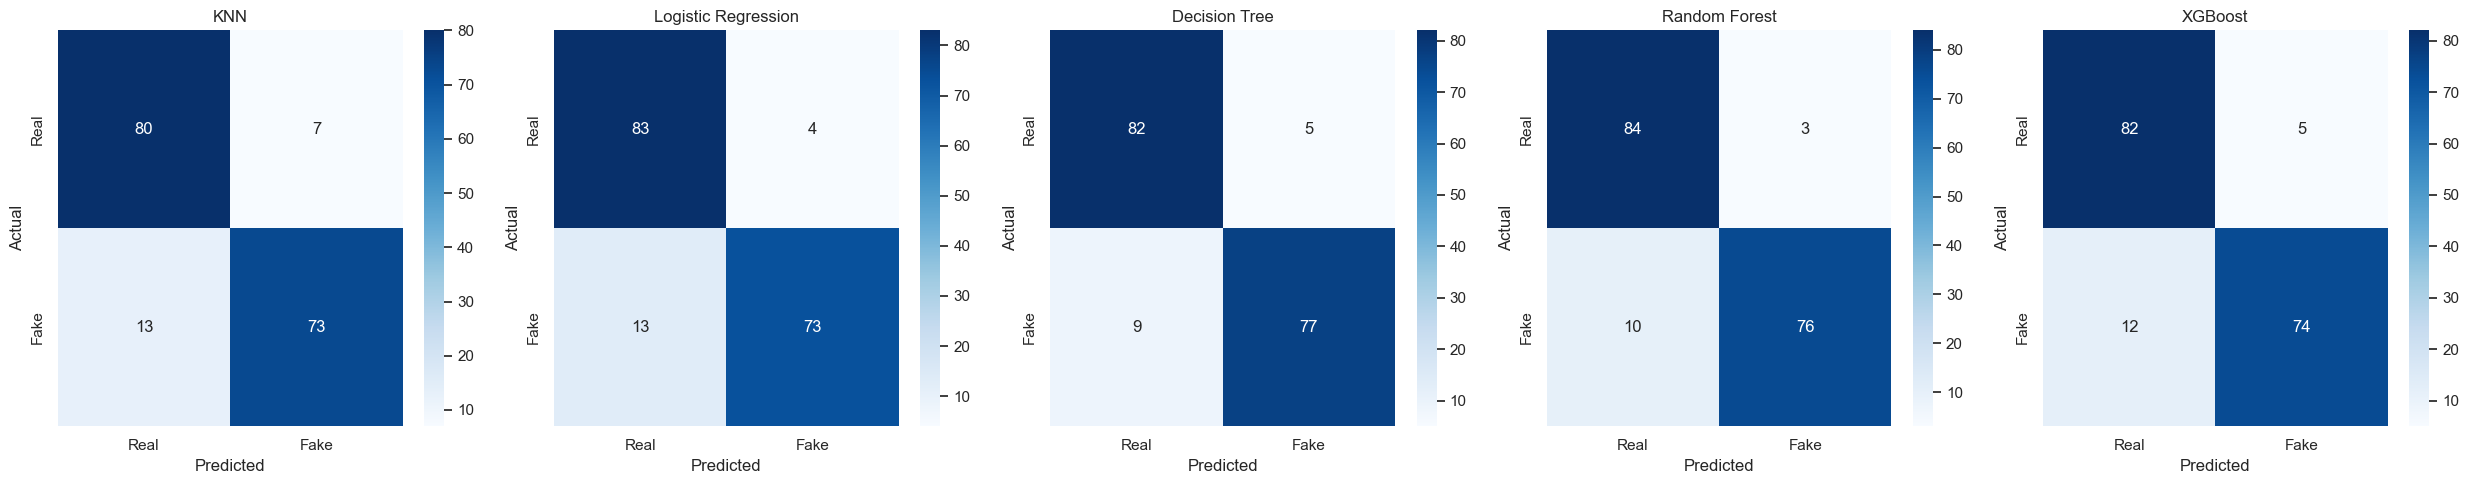

In [15]:
# In [30]: Confusion Matrices
cms = {
    "KNN": confusion_matrix(y_test, pred_knn),
    "Logistic Regression": confusion_matrix(y_test, pred_log),
    "Decision Tree": confusion_matrix(y_test, pred_dt),
    "Random Forest": confusion_matrix(y_test, pred_rf),
    "XGBoost": confusion_matrix(y_test, pred_xgb)
}

class_names = ['Real', 'Fake']

fig, axes = plt.subplots(1, 5, figsize=(25,5))
for ax, (title, cm) in zip(axes, cms.items()):
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")
plt.tight_layout()
plt.show()

                 Classifier  Train-Accuracy  Test-Accuracy
0            KNN-Classifier        0.945137       0.884393
1       Logistic regression        0.915212       0.901734
2  Decision Tree-Classifier        0.960100       0.919075
3             Random Forest        0.957606       0.924855
4                   XGBoost        1.000000       0.901734


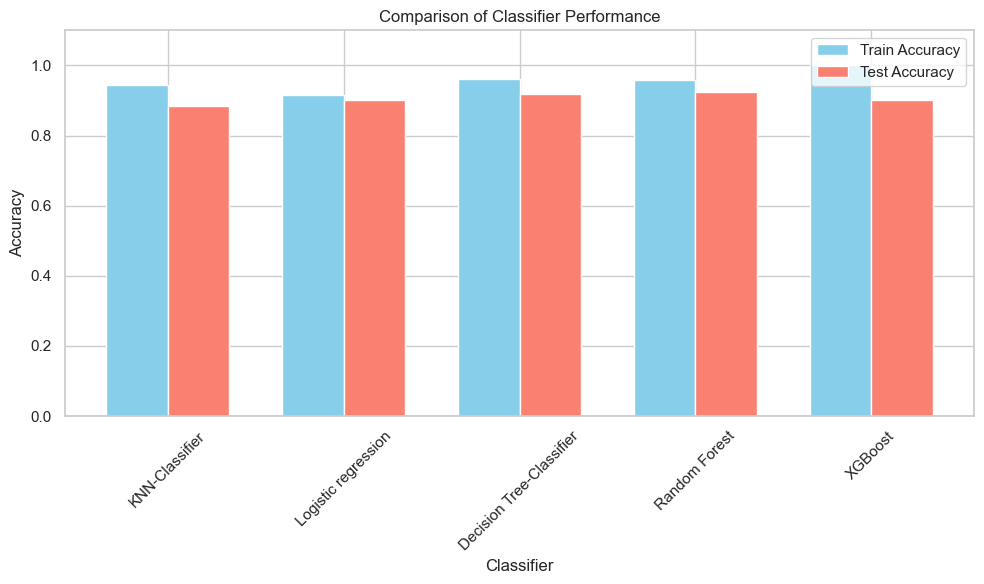

In [16]:
# In [32]: Collect results
all_model_result = pd.DataFrame(columns=['Classifier', 'Train-Accuracy', 'Test-Accuracy'])
all_model_result.loc[0] = ['KNN-Classifier', train_accuracy, test_accuracy]
all_model_result.loc[1] = ['Logistic regression', train_accuracy1, test_accuracy1]
all_model_result.loc[2] = ['Decision Tree-Classifier', train_accuracy2, test_accuracy2]
all_model_result.loc[3] = ['Random Forest', train_accuracy3, test_accuracy3]
all_model_result.loc[4] = ['XGBoost', train_accuracy4, test_accuracy4]

print(all_model_result)

# Bar chart
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(all_model_result))

plt.bar(index, all_model_result['Train-Accuracy'], bar_width, label='Train Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], all_model_result['Test-Accuracy'], bar_width, label='Test Accuracy', color='salmon')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Performance')
plt.xticks([i + bar_width/2 for i in index], all_model_result['Classifier'], rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()